# Introduction

## What is this notebook?
This project, Learning Rate Visualizer, provides an intuitive way to understand the impact of the learning rate—a key hyperparameter in machine learning optimization. Using randomly generated data, this tool demonstrates how different learning rates affect model convergence. The visualization is built using NumPy for data generation and Matplotlib for plotting, offering a clear and interactive approach to selecting an optimal learning rate when training machine learning models.

# Content

##Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

##Methods

In [58]:
def generate_data():
  """
  Generate random data for linear regression.

  Returns:
  X (numpy.ndarray): Input features.
  y (numpy.ndarray): Target values.
  """
  np.random.seed(42)
  X = 2 * np.random.rand(100, 1)
  y = 4 + 3 * X + np.random.randn(100, 1)
  return X, y

In [63]:
def plot_convergence(learning_rate):
    """
    Plot the convergence of SGD and Adam optimizers for linear regression.

    Args:
    learning_rate (float): Learning rate for the SGD optimizer.
    """

    # Generate random data and scale it for better fitting
    X, y = generate_data()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)

    # Calculate Stochastic Gradient Descent Loss while training
    sgd = SGDRegressor(learning_rate='constant', eta0=learning_rate, max_iter=100, tol=1e-3)
    losses_sgd = []

    for _ in range(100):
        sgd.partial_fit(X_scaled, y_scaled.ravel())
        loss = np.mean((sgd.predict(X_scaled) - y_scaled.ravel())**2)
        losses_sgd.append(loss)

    # Calculate ADAM Loss while training
    adam = Adam(learning_rate=learning_rate)
    weights = tf.Variable(np.random.randn(1, 1), dtype=tf.float32)
    bias = tf.Variable(np.random.randn(1), dtype=tf.float32)
    losses_adam = []

    y_scaled_tensor = tf.convert_to_tensor(y_scaled, dtype=tf.float32)

    for _ in range(100):
        with tf.GradientTape() as tape:
            preds = X_scaled @ weights + bias
            loss = tf.reduce_mean(tf.square(preds - y_scaled_tensor))
        grads = tape.gradient(loss, [weights, bias])
        adam.apply_gradients(zip(grads, [weights, bias]))
        losses_adam.append(loss.numpy())

    # Plot the figure
    plt.figure(figsize=(4, 2.5))
    plt.plot(range(100), losses_sgd, label='SGD')
    plt.plot(range(100), losses_adam, label='Adam')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Convergence of ML Algorithms (Learning Rate: {learning_rate})')
    plt.legend()
    plt.show()

##Plots

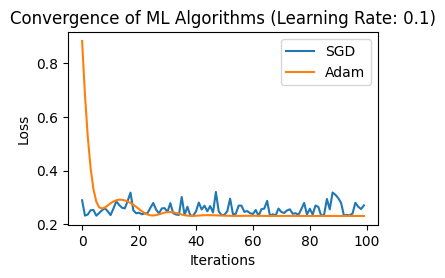

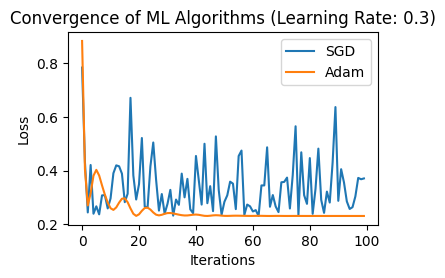

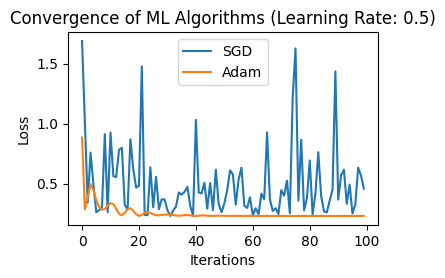

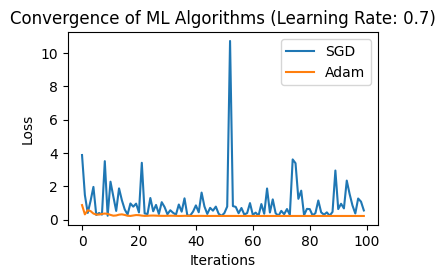

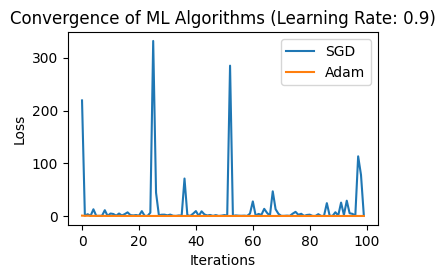

In [64]:
def plot_data():
  """
  Plot the generated data for linear regression.
  """
  learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9] # Arbitrary learning rates for converges observation
  for learning_rate in learning_rates:
      plot_convergence(learning_rate)

# Conclusion

This project provided a visual and intuitive way to understand how different learning rates influence model training. By comparing SGD and Adam optimizers, users can observe how learning rates affect convergence speed and stability. This simple yet effective approach helps in selecting an appropriate learning rate when training machine learning models, reinforcing the importance of tuning hyperparameters for optimal performance. For more informations: https://developers.google.com/machine-learning/crash-course/linear-regression/hyperparameters